<a href="https://colab.research.google.com/github/chaeeerish/bootcamp_team/blob/main/deeplearning/classification_efficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.데이터 로드, 정제, 확인

In [1]:
#google drive 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
#import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

import imageio #이미지 불러오기
# import skimage # Numpy배열로 이미지 객체를 다룬다.
# import skimage.io
# import skimage.transform

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/content/drive/MyDrive/htp_project/dataset/tree_type.csv', encoding='CP949')
df

,img_name,type
0,전체1.png,0
1,전체2.png,0
2,전체3.png,0
3,전체4.png,0
4,전체5.png,0
...,...,...
821,전체823.png,1
822,전체824.png,1
823,전체825.png,1
824,전체826.png,1


In [4]:
#type 확인: 0(상록수), 1(버드나무), 2(고목), 3(그루터기)
df['type'].unique()

array([0, 2, 3, 4, 1])

In [5]:
#type별 데이터 수 확인
df['type'].value_counts()

0    403
1    149
2    139
3    120
4     15
Name: type, dtype: int64

In [6]:
df_0 = df[df['type']==0]

In [7]:
#type 0 데이터 150개 추출
df_0 = df_0.iloc[:150]
df_0

,img_name,type
0,전체1.png,0
1,전체2.png,0
2,전체3.png,0
3,전체4.png,0
4,전체5.png,0
...,...,...
234,전체235.png,0
236,전체237.png,0
237,전체238.png,0
238,전체239.png,0


In [8]:
df_remove_0 = df[df['type']!=0]
df_remove_0

,img_name,type
8,전체9.png,2
17,전체18.png,3
25,전체26.png,2
28,전체29.png,2
31,전체32.png,2
...,...,...
821,전체823.png,1
822,전체824.png,1
823,전체825.png,1
824,전체826.png,1


In [9]:
df_remove_0['type'].unique()

array([2, 3, 4, 1])

In [10]:
df_origin = df

In [11]:
#균형 맞춘 데이터 생성
df = pd.concat([df_0, df_remove_0])
df

,img_name,type
0,전체1.png,0
1,전체2.png,0
2,전체3.png,0
3,전체4.png,0
4,전체5.png,0
...,...,...
821,전체823.png,1
822,전체824.png,1
823,전체825.png,1
824,전체826.png,1


In [12]:
df['type'].value_counts()

0    150
1    149
2    139
3    120
4     15
Name: type, dtype: int64

In [13]:
IMAGE_PATH = '/content/drive/MyDrive/htp_project/dataset/tree_img/'

In [14]:
image_files = list(os.listdir(IMAGE_PATH))
print(image_files)

['전체7.png', '전체4.png', '전체6.png', '전체2.png', '전체3.png', '전체5.png', '전체1.png', '전체8.png', '전체11.png', '전체9.png', '전체10.png', '전체20.png', '전체26.png', '전체31.png', '전체30.png', '전체14.png', '전체25.png', '전체29.png', '전체28.png', '전체15.png', '전체24.png', '전체21.png', '전체22.png', '전체32.png', '전체23.png', '전체16.png', '전체19.png', '전체17.png', '전체27.png', '전체18.png', '전체13.png', '전체12.png', '전체34.png', '전체39.png', '전체37.png', '전체45.png', '전체33.png', '전체44.png', '전체35.png', '전체42.png', '전체36.png', '전체40.png', '전체38.png', '전체43.png', '전체46.png', '전체41.png', '전체55.png', '전체48.png', '전체47.png', '전체52.png', '전체49.png', '전체50.png', '전체53.png', '전체51.png', '전체54.png', '전체60.png', '전체63.png', '전체57.png', '전체62.png', '전체59.png', '전체61.png', '전체58.png', '전체64.png', '전체56.png', '전체65.png', '전체68.png', '전체74.png', '저

In [15]:
file_names = list(df['img_name'])
print(file_names)

['전체1.png', '전체2.png', '전체3.png', '전체4.png', '전체5.png', '전체6.png', '전체7.png', '전체8.png', '전체10.png', '전체11.png', '전체12.png', '전체13.png', '전체14.png', '전체15.png', '전체16.png', '전체17.png', '전체19.png', '전체20.png', '전체21.png', '전체22.png', '전체23.png', '전체24.png', '전체25.png', '전체27.png', '전체28.png', '전체30.png', '전체31.png', '전체34.png', '전체38.png', '전체40.png', '전체41.png', '전체43.png', '전체46.png', '전체47.png', '전체48.png', '전체51.png', '전체52.png', '전체53.png', '전체54.png', '전체56.png', '전체57.png', '전체59.png', '전체63.png', '전체64.png', '전체66.png', '전체69.png', '전체72.png', '전체76.png', '전체77.png', '전체84.png', '전체87.png', '전체88.png', '전체89.png', '전체92.png', '전체94.png', '전체98.png', '전체99.png', '전체102.png', '전체106.png', '전체109.png', '전체111.png', '전체112.png', '전체114.png', '전체115.png', '전체116.png', '전체117.png', '전체119.png', '전체120.png', '전체121.png', '전체123.png', '전체126.png', '전체127.png', '전체129.png', '전체130.png', '전체131.png', '전체133.png', '전체134.png', '전체140.png', '전체142.png', '전체143.png', '전체144.png', '전체145.png'

In [17]:
#이미지 그리는 함수
def draw_category_images(var,cols=5):
    categories = (df.groupby([var])[var].nunique()).index
    f, ax = plt.subplots(nrows=len(categories),ncols=cols, figsize=(2*cols,2*len(categories)))
    # draw a number of images for each location
    for i, cat in enumerate(categories):
        sample = df[df[var]==cat].sample(cols)
        for j in range(0,cols):
            file=IMAGE_PATH + sample.iloc[j]['img_name']
            im=imageio.imread(file)
            ax[i, j].imshow(im, resample=True)
            ax[i, j].set_title(cat, fontsize=9)  
    plt.tight_layout()
    plt.show()

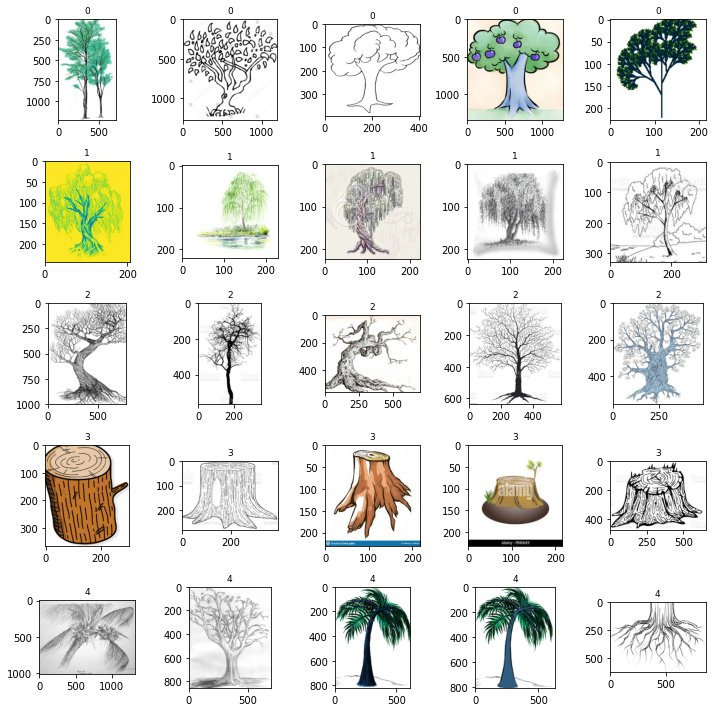

In [18]:
draw_category_images('type')

# 2.학습/테스트 데이터 분리

In [19]:
#train set:test set = 0.8:0.2
train_df, test_df = train_test_split(df, test_size=0.2, random_state=1, stratify=df['type'])

In [20]:
#확인
print("Train set rows: {}".format(train_df.shape[0]))
print("Test  set rows: {}".format(test_df.shape[0]))

Train set rows: 458
Test  set rows: 115


In [24]:
def read_image(file_name):
  # print(file_name)
  image = cv2.imread(IMAGE_PATH + file_name)
  image = cv2.resize(image, dsize=(300, 300))
  # print(image.shape)
  return image[:,:,:3]

In [25]:
def categories_encoder(dataset):
    #file명을 읽어 이미지 경로에서 불러온다. X 값.
    X = np.stack(dataset['img_name'].apply(read_image))
    # subspecies를 더미변수화 하여 y값으로
    y = pd.get_dummies(dataset['type'], drop_first=False)
    return X, y

In [26]:
#file명을 읽어 이미지 경로에서 불러온다. X 값.
X_train, y_train = categories_encoder(train_df)
X_test, y_test = categories_encoder(test_df)

In [27]:
#개수, size, channel
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(458, 300, 300, 3)
(458, 5)
(115, 300, 300, 3)
(115, 5)


In [28]:
#하이퍼 파라미터 생성
BATCH_SIZE = 32 # 한 번에 처리할 데이터량 설정
EPOCHS = 20 # 신경망을 학습할 횟수
VERBOSE = 1 # 학습 진행 상황 출력 모드 설정 

# 3.efficientnet
[Link](https://github.com/qubvel/efficientnet)

In [29]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 2.8 MB/s eta 0:00:00


In [30]:
import numpy as np
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import efficientnet.keras as efn 
import keras 
from keras.models import Model

from keras.applications.imagenet_utils import decode_predictions

from efficientnet.keras import EfficientNetB0, EfficientNetB3
from efficientnet.keras import center_crop_and_resize, preprocess_input

## if you use tensorflow.keras: 
# from efficientnet.tfkeras import EfficientNetB0
# from efficientnet.tfkeras import center_crop_and_resize, preprocess_input

import os

# 4.Download EfficientNet

In [31]:
base_model = efn.EfficientNetB3(weights='imagenet') #imagenet 가중치 사용

50086816/50086816 [==============================] - 1s 0us/step


# 5.output layer 변경 및 모델 확인

In [32]:
#output layer 변경
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
net = Dense(5, activation='softmax')(base_model.layers[-2].output)

In [38]:
model = Model(inputs=base_model.input, outputs=net)

In [39]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [40]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 150, 150, 40  1080        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 150, 150, 40  160         ['stem_conv[0][0]']              
                                )                                                           

# 6.모델 학습 및 결과 확인

In [41]:
from keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping(patience=3)

history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=VERBOSE,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/20
12/12 [==============================] - 80s 1s/step - loss: 0.7677 - accuracy: 0.7350 - val_loss: 1883.1781 - val_accuracy: 0.2717
Epoch 2/20
12/12 [==============================] - 11s 879ms/step - loss: 0.1563 - accuracy: 0.9645 - val_loss: 1097.6185 - val_accuracy: 0.2826
Epoch 3/20
12/12 [==============================] - 11s 885ms/step - loss: 0.0914 - accuracy: 0.9754 - val_loss: 256.8573 - val_accuracy: 0.2717
Epoch 4/20
12/12 [==============================] - 11s 889ms/step - loss: 0.0825 - accuracy: 0.9754 - val_loss: 191.6269 - val_accuracy: 0.2500
Epoch 5/20
12/12 [==============================] - 11s 891ms/step - loss: 0.1084 - accuracy: 0.9699 - val_loss: 377.7861 - val_accuracy: 0.2826
Epoch 6/20
12/12 [==============================] - 11s 896ms/step - loss: 0.1371 - accuracy: 0.9563 - val_loss: 147.0727 - val_accuracy: 0.3696
Epoch 7/20
12/12 [==============================] - 11s 894ms/step - loss: 0.1211 - accuracy: 0.9699 - val_loss: 2.7465 - val_accur

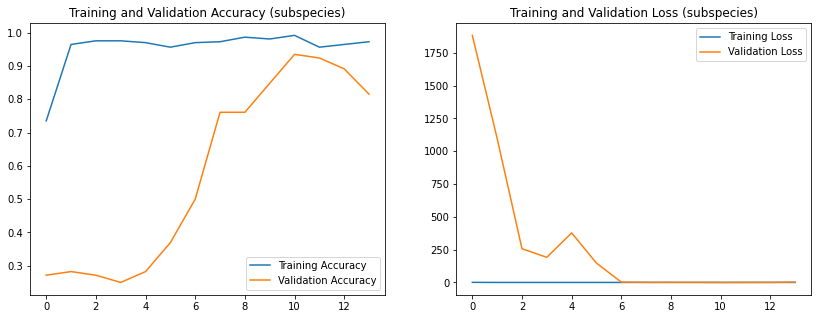

In [42]:
#결과 확인
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (subspecies)')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (subspecies)')

plt.show()

In [43]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 2s 521ms/step - loss: 1.7268 - accuracy: 0.8609


[1.726812720298767, 0.8608695864677429]

In [44]:
#이미지 예측
predictions = model.predict(X_test)

4/4 [==============================] - 3s 190ms/step


In [45]:
np.argmax(predictions[2])

1

In [46]:
#3번째 값이 1인 것 확인
y_test

,0,1,2,3,4
109,0,0,1,0,0
657,0,1,0,0,0
615,0,1,0,0,0
80,0,0,1,0,0
155,1,0,0,0,0
...,...,...,...,...,...
111,1,0,0,0,0
732,0,1,0,0,0
173,1,0,0,0,0
313,0,0,1,0,0


# 7.테스트

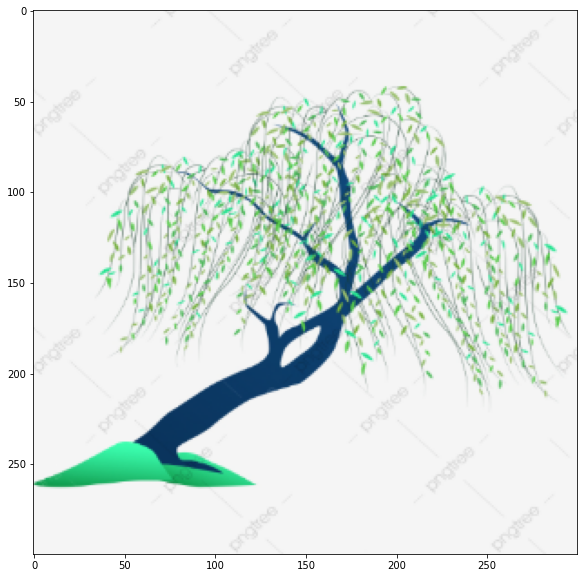

In [47]:
test_image = cv2.imread('/content/drive/MyDrive/htp_project/dataset/test_1.PNG')
test_image = cv2.resize(test_image, dsize=(300, 300))

plt.figure(figsize=(10,10))
plt.imshow(test_image)
plt.show()

In [102]:
image = cv2.imread('/content/drive/MyDrive/htp_project/dataset/test_1.PNG')
image = cv2.resize(image, dsize=(300, 300))
test_image = np.array(image)

In [104]:
final_test_image = np.expand_dims(test_image, axis=0)

In [105]:
final_test_image.shape

(1, 300, 300, 3)

In [107]:
prediction = model.predict(final_test_image)

1/1 [==============================] - 0s 36ms/step


In [111]:
#예측 클래스 확인: 1(버드나무)
np.argmax(prediction)

1

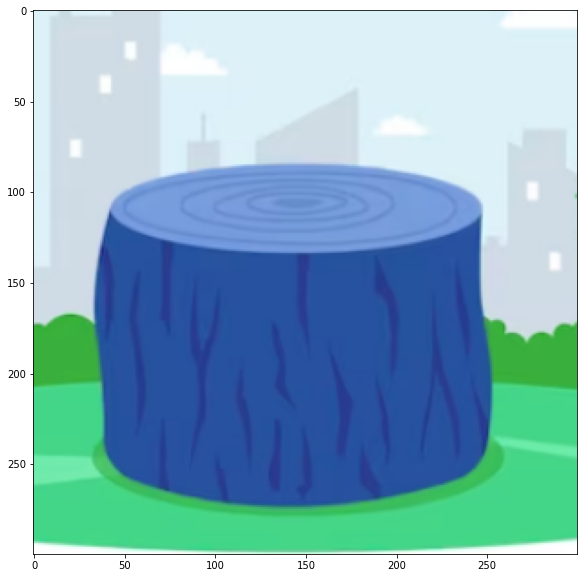

In [60]:
test_image = cv2.imread('/content/drive/MyDrive/htp_project/dataset/test_2.PNG')
test_image = cv2.resize(test_image, dsize=(300, 300))

plt.figure(figsize=(10,10))
plt.imshow(test_image)
plt.show()

In [112]:
image = cv2.imread('/content/drive/MyDrive/htp_project/dataset/test_2.PNG')
image = cv2.resize(image, dsize=(300, 300))
test_image = np.array(image)

In [113]:
final_test_image = np.expand_dims(test_image, axis=0)

In [114]:
final_test_image.shape

(1, 300, 300, 3)

In [115]:
prediction = model.predict(final_test_image)

1/1 [==============================] - 0s 34ms/step


In [118]:
#예측 클래스 확인: 3(그루터기)
np.argmax(prediction)

3